### Step 1: Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./TestData/SMSSpamCollection",sep="\t", names=['label','text']) # added header else 1st row features value will become header
# This file is tab seperated, not comma seperated. Hence used sep="\t"

In [3]:
df.shape

(5572, 2)

In [4]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# To print first 10 rows of text column
for i in range(10):
    print(df.iloc[i,-1])
    print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U

### Step 2: Data Cleaning 

Performing data cleaning by removing special characters and stop words, converting to lower case and applying stemming.

### Regular epression 
1. Python has a built-in package called re, which can be used to work with Regular Expressions.
2. A set is a set of characters inside a pair of square brackets [] with a special meaning

ex : [a-z0-9]- Returns a match for any character alphabetically between a and z, then 0-9.

for more info visit : https://www.w3schools.com/python/python_regex.asp



### NLTK (Natural Language Toolkit) : 
It is a Python library designed for natural language processing (NLP). 

It provides tools for tasks such as tokenization, stemming, tagging, parsing, and semantic reasoning.

### Tokenization: Breaking text into words or sentences.

E.g. :  "I study Machine Learning on GeeksforGeeks." will be word-tokenized as ['I', 'study', 'Machine', 'Learning', 'on', 'GeeksforGeeks', '.'].

### Stemming: Reducing words to their root form.

E.g. The words 'play', 'plays', 'played', and 'playing' convey the same action - hence, we can map them all to their base form i.e. 'play'.

### Stop Words

Stop words are common words in a language that are often filtered out during text processing because they contribute little to the meaning of a sentence. Examples include articles ("a," "an," "the"), prepositions ("in," "on," "at"), conjunctions ("and," "but," "or"), and pronouns ("I," "he," "she").

In NLP, stopwords are frequently filtered out to enhance text analysis and computational efficiency. Eliminating stopwords can improve the accuracy and relevance of NLP tasks by drawing attention to the more important words, or content words.


Converting all characters to either lowercase or uppercase in Natural Language Processing (NLP) is a common preprocessing step. Here's why it is useful:

1. Normalization :

Text data often contains variations in capitalization (e.g., "Apple" vs. "apple"). Converting all text to a single case ensures consistency and avoids treating these as different words.

E.g. : Words like "Playing", "PLAYING", and "playing" all have the same meaning but are treated as different tokens due to differences in capitalization. By converting all text to lowercase (or uppercase), these variations are unified, reducing redundancy and improving the consistency of the data.

2. Reduces Vocabulary Size

In NLP tasks, the vocabulary size (unique words) impacts the complexity of the model. By normalizing case, you reduce the number of unique tokens, which simplifies the model and improves efficiency.

3. Improves Matching 

Case differences can cause mismatches during tokenization or when comparing words. For example, "Python" and "python" would be treated as different tokens without normalization.

4. Avoids Case Sensitivity Issues

Many NLP algorithms and libraries are case-sensitive. Normalizing case ensures that the model doesn't give undue importance to capitalization.

5. Simplifies Feature Extraction

For tasks like sentiment analysis or text classification, case normalization ensures that features are extracted uniformly, regardless of capitalization.

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keerthana.r\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keerthana.r\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
sn = SnowballStemmer("english")
stop = set(stopwords.words('english')) # using set to get the unique words

In [9]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [10]:
def clean_text(sms):
    sms = sms.lower()
    sms = re.sub("[^a-z0-9]",' ',sms) # removing special characters
    sms = nltk.word_tokenize(sms)
    sms = [t for t in sms if len(t) > 1] # To remove the single characters present in the sms
    sms = [sn.stem(word) for word in sms if word not in stop] # Removing stop words and performing stemming
    sms = ' '.join(sms) # 
    
    return sms

In [11]:
clean_text("SMS : Congrats ! You will get a SMS FREE value @ Rs. 99 ONLY!!! .........playing played play PLAY")

'sms congrat get sms free valu rs 99 play play play play'

In [12]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df["cleaned_text"] = df["text"].apply(clean_text)  # using 'apply' method in pandas data frame, using this we can apply "clean_text" method on entire dataframe

### Step3: Data Visualization

A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance in the dataset.

The bigger the word appears in the cloud the more often that word is used.

In [14]:
!pip install wordcloud

In [15]:
from wordcloud import WordCloud

In [18]:
# All the words available in the ham class combining together with space seperated
ham = df[df['label'] == 'ham']['cleaned_text']
hamWords = ' '.join(ham)
hamWords

'go jurong point crazi avail bugi great world la buffet cine got amor wat ok lar joke wif oni dun say earli hor alreadi say nah think goe usf live around though even brother like speak treat like aid patent per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun gon na home soon want talk stuff anymor tonight cri enough today search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh watch eh rememb spell name yes naughti make wet fine way feel way gota serious spell name go tri month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard smth lor finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol lol alway convinc catch bus fri egg make tea eat mom left dinner feel love back amp pack car let know room ahhh work vagu rememb feel like lol wait still clear sure sarcast want live us yeah got

In [19]:
# All the words available in the spam class combining together with space seperated
spam = df[df['label'] == 'spam']['cleaned_text']
spamWords = ' '.join(spam)
spamWords

'free entri wkli comp win fa cup final tkts 21st may 2005 text fa 87121 receiv entri question std txt rate appli 08452810075over18 freemsg hey darl week word back like fun still tb ok xxx std chgs send 50 rcv winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobil 11 month entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl info urgent week free membership 100 000 prize jackpot txt word claim 81010 www dbuk net lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http wap xxxmobilemovieclub com qjkgighjjgcbl england macedonia dont miss goal team news txt ur nation team 87077 eg england 87077 tri wale scotland 4txt 20 poboxox36504w45wq 16 thank subscript rington uk mobil charg month pleas confirm repli yes repli charg 07732584351 rodger burn msg tri cal

In [44]:
def wordclass(data):
    wc = WordCloud()
    wc = wc.generate(data)
    
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(wc)
    plt.show()

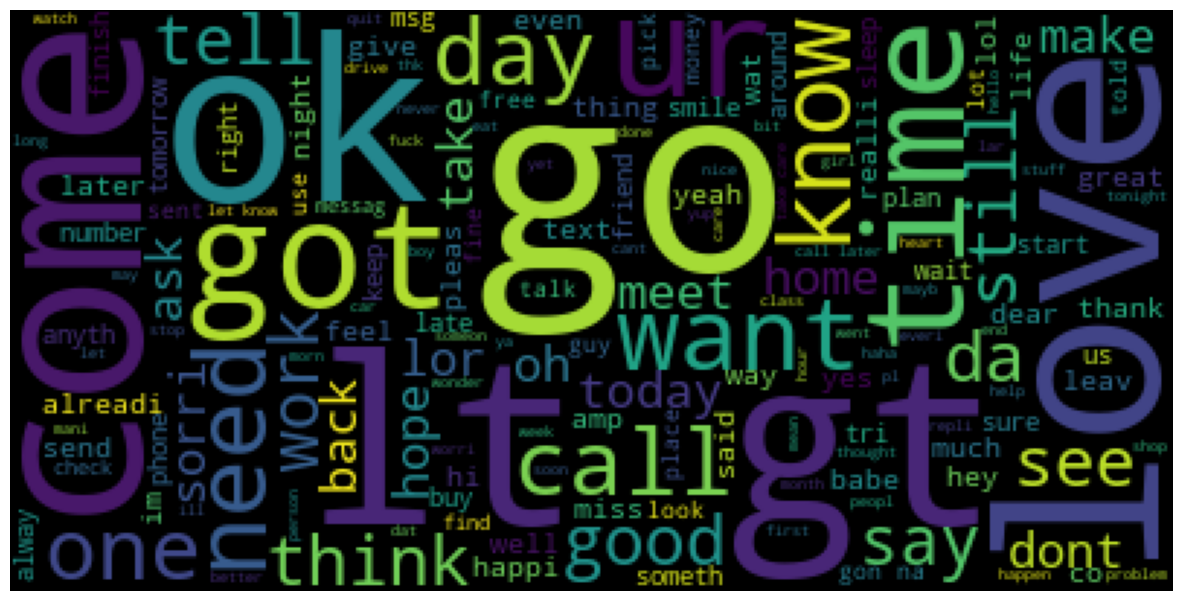

In [45]:
wordclass(hamWords)

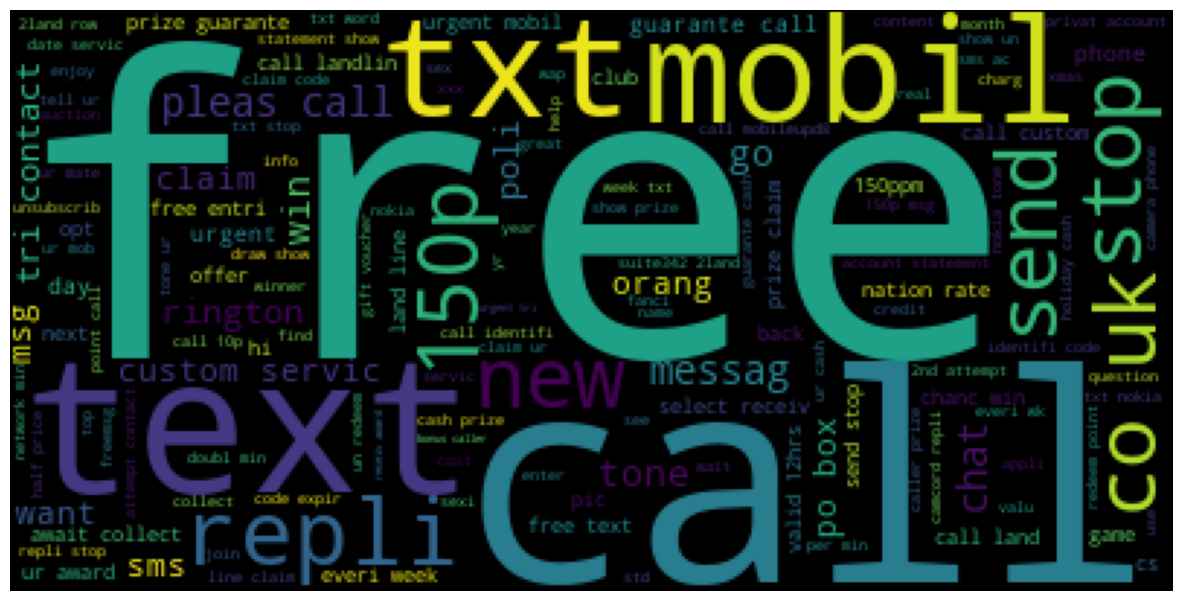

In [46]:
wordclass(spamWords)

### Step4 : Featurization

Featurization in Machine Learning (ML) refers to the process of transforming raw data into a structured format (features) that can be used as input for ML models. Features are the measurable properties or characteristics of the data that the model uses to learn patterns and make predictions.

### Common Featurization Techniques:

1. Scaling and Normalization: Adjusting numerical data to a specific range or distribution.

2. Dimensionality Reduction: Techniques like PCA (Principal Component Analysis) to reduce the number of features while retaining important information.

3. Text Vectorization: Converting text into numerical vectors using methods like TF-IDF or embeddings.
4. Feature Engineering: Creating new features from existing ones (e.g., combining columns, extracting date components).

Types of Featurization:

1. Numerical Data: Scaling, normalization, or polynomial feature generation.

2. Categorical Data: Encoding techniques like one-hot encoding, label encoding, or embeddings.
3. Text Data: Techniques like Bag of Words (BoW), TF-IDF, or word embeddings (e.g., Word2Vec, GloVe).
4. Image Data: Feature extraction using convolutional layers or pre-trained models.
5. Time-Series Data: Extracting features like trends, seasonality, or statistical measures (e.g., mean, variance).

### CountVectorization:

CountVectorizer is the specific implementation of the BoW technique in the scikit-learn library.
It automates the process of tokenization, vocabulary creation, and count matrix generation.

CountVectorization in sklearn refers to the process of converting a collection of text documents into a matrix of token counts. It is implemented in the CountVectorizer class in the scikit-learn library and is commonly used in Natural Language Processing (NLP) tasks.

How It Works:
1. Tokenization:
The text is split into individual words (tokens).
2. Vocabulary Creation:
A vocabulary (set of unique words) is created from the entire corpus/documents.
3. Count Representation:
Each document is represented as a vector where each element corresponds to the count of a word from the vocabulary in that document.

create a sparse matrix where
1. Rows represent documents.
2. Columns represent words in the vocabulary.
3. Values represent the count of each word in the corresponding document.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
cv = CountVectorizer()

### max_features parameter in CountVectorizer 
Represents the maximum number of unique words (features) to include in the vocabulary. It limits the size of the vocabulary to the top max_features most frequent words in the dataset.

How It Works:
1. The CountVectorizer tokenizes the text and calculates the frequency of each word in the corpus.
2. It sorts the words by their frequency in descending order.
3. It selects only the top max_features most frequent words to include in the vocabulary.
4. Words outside the top max_features are ignored.

Why Use max_features?
1. To reduce the dimensionality of the feature space, especially when working with large datasets.
2. To focus on the most important (frequent) words and ignore less relevant ones.
3. To improve computational efficiency and reduce memory usage.

In [51]:
X = cv.fit_transform(df['cleaned_text'])

In [53]:
X.shape

(5572, 7242)

Here, 
1. 5572: This represents the number of rows in the dataset, which corresponds to the number of documents (or text samples) in the cleaned_text column of the DataFrame df.
2. 7242: This represents the size of the vocabulary, i.e., the total number of unique words (tokens) identified by the CountVectorizer after processing the text data.

In [54]:
# Now will reduce size of vocabulary to 5000 using "max_features" parameter in CountVectorizer

In [55]:
cv = CountVectorizer(max_features=5000)

In [59]:
X = cv.fit_transform(df['cleaned_text']).toarrayay()
X.shape

(5572, 5000)

now we have 5572 documents and top 5000 words in vocabulary

In [89]:
Y=pd.get_dummies(df['label'])
Y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


In [91]:
Y = pd.get_dummies(df['label'])['spam'].values.astype(int)
Y
# 0 : ham, 1: spam

array([0, 0, 1, ..., 0, 0, 0])

### step5: Model Building

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [95]:
model = MultinomialNB()

In [96]:
model.fit(X_train,y_train)

MultinomialNB()

In [98]:
y_pred = model.predict(X_test)

In [99]:
pd.DataFrame({'Actual': y_test, 'Predict': y_pred})

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1110,0,0
1111,0,0
1112,0,0
1113,0,0


### step6: Model Evaluation

In [100]:
# To measure how well the model has learned the patterns in the training data.
print('Accuracy on Traning Data')
print(model.score(X_train,y_train))

Accuracy on Traning Data
0.9928202827013687


In [101]:
# To measure how well the model generalizes to unseen data.
print('Accuracy on test Data')
print(model.score(X_test,y_test))

Accuracy on test Data
0.9874439461883409


Always evaluate both training and testing accuracy to detect underfitting or overfitting.

Here our model perform better with both training and test dataset.

In [102]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

### confusion matrix 
A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives.

In [103]:
confusion_matrix(y_test,y_pred)

array([[960,   6],
       [  8, 141]], dtype=int64)

here,
TP : 960
FP : 8
FN : 6
TN : 141

### F1-score

In [105]:
f1_score(y_test,y_pred)

0.9527027027027025

### Classification Report

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [111]:
y_test.shape

(1115,)

Totally, there are 1115 documents in training data set.

According to 'support' values in the above classification_report,
* 966 belongs to class 0 ==> ham
* 149 belongs to class 1 ==> spam